In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [16]:
df = pd.read_csv('mock_kaggle.csv')
df = df.rename(columns={'data': 'date','venda': 'sold', 'estoque': 'stock', 'preco': 'price'})

In [17]:
df

,date,sold,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29
...,...,...,...,...
932,2016-07-27,98,3179,2.39
933,2016-07-28,108,3071,2.39
934,2016-07-29,128,4095,2.39
935,2016-07-30,270,3825,2.39


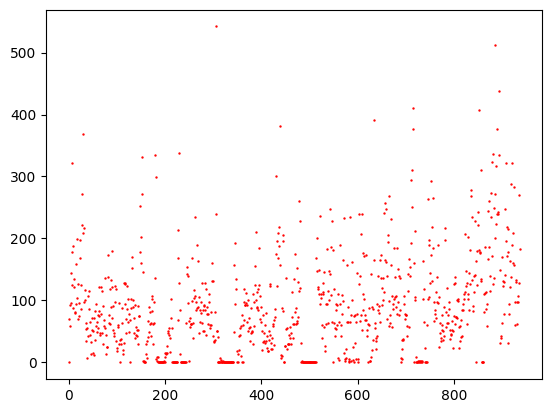

In [18]:
# df.sold.plot()

x_sold = df.index
y_sold = df.sold

plt.scatter(x_sold, y_sold, s=0.5, color='red')

лр0

In [19]:
sum_xi_x_yi = 0

id = 0
while id < len(y_sold):
    sum_xi_x_yi += x_sold[id] * y_sold[id]
    id += 1

sum_xi = sum(x_sold)
sum_yi = sum(y_sold)

sum_xi_squared = 0

for val in x_sold:
    sum_xi_squared += val ** 2

n = len(x_sold)
a = (n * sum_xi_x_yi - sum_xi*sum_yi) / (n * sum_xi_squared - sum_xi**2)
b = (sum_yi - a * sum_xi) / n

def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    plt.plot(x, y)  


def my_formula(x):
    return a * x + b

лр1

In [20]:
endog_sold = y_sold
exog_sold = sm.add_constant(x_sold)

model_sold = sm.RecursiveLS(endog_sold, exog_sold)
res_sold = model_sold.fit()

сравнение

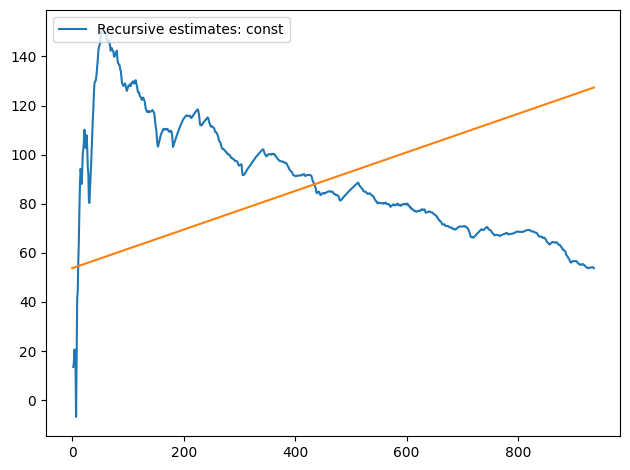

In [21]:
res_sold.plot_recursive_coefficient(alpha=None)
graph(my_formula, range(0, n))